url: https://www.youtube.com/watch?v=HF6YmqI8Q0E

In [ ]:
import pandas as pd

In [ ]:
df_master = pd.read_csv("/content/nlp_datascience_cram_school_5.csv")
df_master

,性別,年代,回答
0,男性,40代,駅伝を見る
1,男性,30代,おせちを食べる
2,男性,20代,家族でゲームをします
3,女性,40代,おせち作り
4,男性,50代,正月飾りを作ります
5,男性,50代,正月飾りを作ります
6,女性,50代,お雑煮を食べる
7,女性,40代,家族団欒する
8,男性,20代,初詣に行く
9,男性,20代,おもちを食べます


In [ ]:
df = df_master.copy()
df = df.dropna(subset=["回答"])
df

,性別,年代,回答
0,男性,40代,駅伝を見る
1,男性,30代,おせちを食べる
2,男性,20代,家族でゲームをします
3,女性,40代,おせち作り
4,男性,50代,正月飾りを作ります
5,男性,50代,正月飾りを作ります
6,女性,50代,お雑煮を食べる
7,女性,40代,家族団欒する
8,男性,20代,初詣に行く
9,男性,20代,おもちを食べます


In [ ]:
!apt-get install -y mecab libmecab-dev mecab-ipadic-utf8
!pip install mecab-python3

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libmecab-dev is already the newest version (0.996-14build9).
mecab-ipadic-utf8 is already the newest version (2.7.0-20070801+main-3).
mecab is already the newest version (0.996-14build9).
0 upgraded, 0 newly installed, 0 to remove and 30 not upgraded.


In [ ]:
!pip install unidic-lite

In [ ]:
import MeCab
m = MeCab.Tagger ()

def word_analysis(doc):
    node = m.parseToNode(doc)
    word_list=[]

    while node:
        hinshi = node.feature.split(",")[0]
        if (hinshi == "名詞"):
            word_list.append(node.surface)
        node = node.next

    return word_list

In [ ]:
df["名詞"] = df["回答"].apply(word_analysis)
df

,性別,年代,回答,名詞
0,男性,40代,駅伝を見る,[駅伝]
1,男性,30代,おせちを食べる,[おせち]
2,男性,20代,家族でゲームをします,"[家族, ゲーム]"
3,女性,40代,おせち作り,"[おせち, 作り]"
4,男性,50代,正月飾りを作ります,"[正月, 飾り]"
5,男性,50代,正月飾りを作ります,"[正月, 飾り]"
6,女性,50代,お雑煮を食べる,[雑煮]
7,女性,40代,家族団欒する,"[家族, 団欒]"
8,男性,20代,初詣に行く,[初詣]
9,男性,20代,おもちを食べます,[もち]


In [ ]:
import itertools
import collections

words_pickup = df[df["性別"]=="男性"]["名詞"]
words = list(itertools.chain.from_iterable(words_pickup))
c = collections.Counter(words)

display(words[:10])
display(c)

['駅伝', 'おせち', '家族', 'ゲーム', '正月', '飾り', '正月', '飾り', '初詣', 'もち']

Counter({'駅伝': 2,
         'おせち': 1,
         '家族': 3,
         'ゲーム': 1,
         '正月': 2,
         '飾り': 2,
         '初詣': 2,
         'もち': 1,
         'TV': 3,
         '観賞': 1,
         'もちつき': 2,
         '百': 1,
         '一': 1,
         '首': 1,
         '三昧': 1,
         'かるた': 1,
         '取り': 1,
         '雑煮': 1})

    itertools は Python の標準ライブラリの一部です。このモジュールは、イテレータを操作するための便利な関数を提供します。
    itertools には様々な関数が含まれており、例えばリストの結合、組み合わせの生成、無限のイテレータの作成などが可能です。

    代表的な itertools の関数には以下のようなものがあります：

    itertools.chain: 複数のイテラブル（例: リストやタプル）を結合して一つのイテレータにします。
    itertools.product: 複数のイテラブルから直積（デカルト積）を生成します。
    itertools.combinations および itertools.permutations: イテラブルから組み合わせや順列を生成します。
    このモジュールは効率的なイテレータの生成や操作をサポートするため、特に大規模なデータ処理や組み合わせの生成などで役立ちます。
    上記のコードで使用されている itertools.chain.from_iterable は、入れ子のリストを平坦化して一つのリストに変換するための関数です。

    words = list(itertools.chain.from_iterable(words_pickup)): itertools.chain.from_iterable を使用して、入れ子のリストを平坦化し、1つのリストに変換します。
    これにより、"男性" の回答から抽出されたすべての名詞が1つのリストになります。


<Axes: xlabel='count'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 23478 (\N{CJK UNIFIED IDEOGRAPH-5BB6}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 26063 (\N{CJK UNIFIED IDEOGRAPH-65CF}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 39365 (\N{CJK UNIFIED IDEOGRAPH-99C5}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 20253 (\N{CJK UNIFIED IDEOGRAPH-4F1D}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 27491 (\N{CJK UNIFIED IDEOGRAPH-6B63}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 26376 (\N{CJK UNIFIED IDEOGRAPH-67

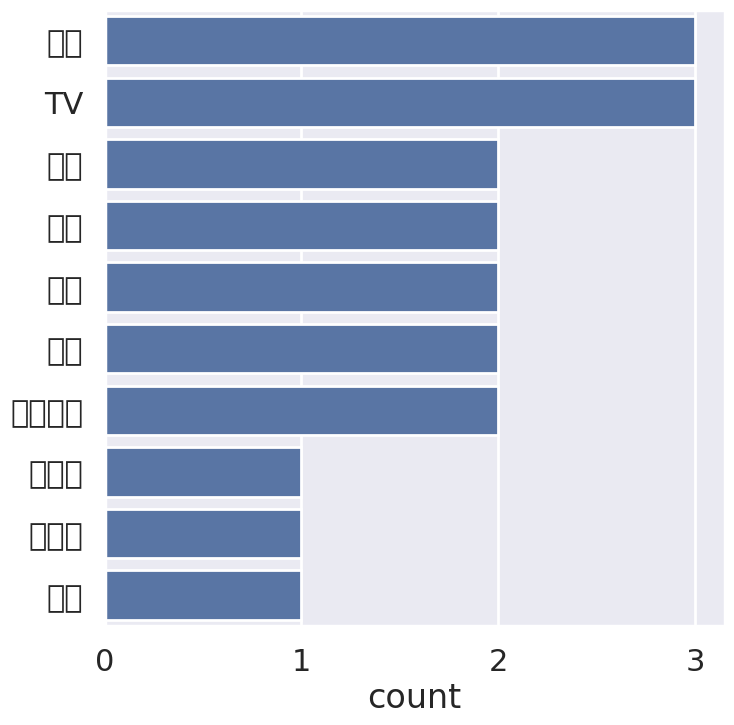

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 日本語対応のフォントをダウンロード or PC内で探す
sns.set(font="'IPAexGothic",context="poster")
fig = plt.subplots(figsize=(8,8))
sns.countplot(y=words,order=[i[0] for i in c.most_common(10)])

    このコードは、Pythonのデータ可視化ライブラリであるSeabornとMatplotlibを使用して、単語の出現頻度を表示するためのグラフを作成しています。
    以下に各行の解説を示します。

    sns.set(font='IPAexGothic', context='poster'):

    sns.set() はSeabornのスタイルやコンテキストを設定する関数です。
    font='IPAexGothic' は、使用するフォントを 'IPAexGothic' に設定しています。
    これにより、日本語フォント 'IPAexGothic' が使用されます。

    context='poster' は、プロットのコンテキスト（スケールやサイズなどの設定）を 'poster' に設定しています。
    'poster'は相対的に大きなサイズのコンテキストです。

    fig = plt.subplots(figsize=(8,8)):plt.subplots() はMatplotlibでサブプロットを作成するための関数です。
    fig はFigureオブジェクトで、fig, axのようにタプルで返されます。
    この場合、axはAxesサブプロットオブジェクトです。
    figsize=(8, 8) はFigureのサイズを指定しています。
    
    sns.countplot(y=words, order=[i[0] for i in c.most_common(10)]):
    sns.countplot() は、データの個数を数え上げて棒グラフで表示するSeabornの関数です。
    y=words は、データのy軸（縦軸）に使用する変数を指定しています。
    ここではwordsがその変数であると仮定しています。
    order=[i[0] for i in c.most_common(10)] は、x軸（横軸）の順序を指定しています。
    c.most_common(10) は単語の出現頻度の上位10件を取得し、その順序で表示するようにしています。

In [ ]:
c.most_common(10)

[('家族', 3),
 ('TV', 3),
 ('駅伝', 2),
 ('正月', 2),
 ('飾り', 2),
 ('初詣', 2),
 ('もちつき', 2),
 ('おせち', 1),
 ('ゲーム', 1),
 ('もち', 1)]

In [ ]:
pip install japanize-matplotlib

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26412 (\N{CJK UNIFIED IDEOGRAPH-672C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 35486 (\N{CJK UNIFIED IDEOGRAPH-8A9E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65306 (\N{FULLWIDTH COLON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 108 (l) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython

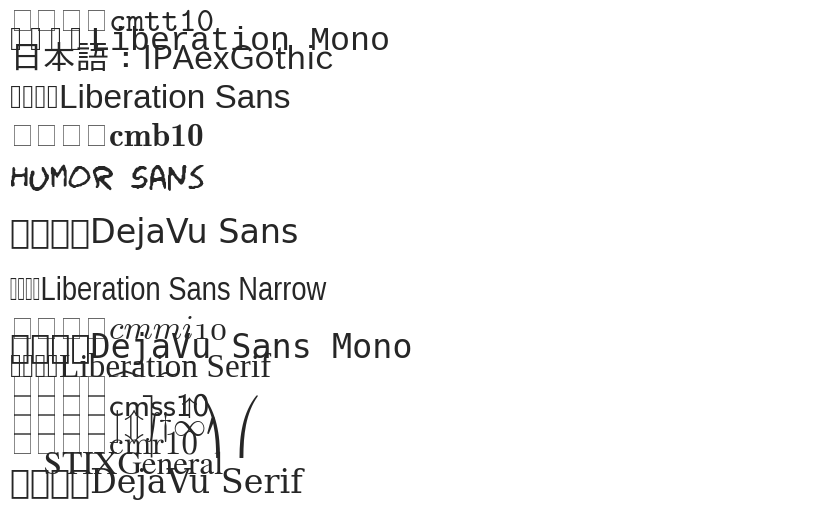

In [ ]:
# フォント探し
import matplotlib.font_manager
import japanize_matplotlib

# フォントを全て読み込み
fonts = set([f.name for f in matplotlib.font_manager.fontManager.ttflist])

# 描画領域のサイズ調整
plt.figure(figsize=(10,len(fonts)/4))

# フォントの表示
for i, font in enumerate(fonts):
    plt.text(0, i, f"日本語：{font}", fontname=font)

# 見やすいように軸を消す
plt.ylim(0, len(fonts))
plt.axis("off")

plt.show()